## Huspris

Her har vi data som beskriver boligpriser i Ames, Iowa fra 2006 til 2010. Datasettet inneholder mange variabler som kan brukes til å vurdere boligverdi. Se [her](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview) for mer informasjon om data. I denne oppgaven ser vi kun på de numeriske data. 

In [90]:
# imports
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet as EN
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.svm import SVR
from sklearn.gaussian_process import GaussianProcessRegressor as GPR

import plotly.express as px
import plotly.graph_objects as go

In [91]:
# les inn husprisdata
df = pd.read_csv('data/huspris.csv')

In [92]:
# del data i mål-, og prediktorvariabler
reduced_df = df.select_dtypes(include=[np.number]).drop('Id', axis=1).dropna()
X = reduced_df.drop('SalePrice', axis=1).values
y = reduced_df['SalePrice'].values

Del data i trenings-, validerigns-, og testdata med størrelser 70%, 15%, 15% av data. 

In [93]:
# dele data i trenings, validerings og testdata
# generer X_train, X_val, X_test, y_train, y_val, y_test
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

Tren en Grunnlinjemodell på treningsdata og finn validerings-RMSE. 

In [94]:
baseline = DummyRegressor(strategy="mean").fit(X_train, y_train)
rmse_baseline = np.sqrt(mean_squared_error(y_val, baseline.predict(X_val)))
rmse_baseline

91233.66453633786

Tren en Lasso regresjonsmodell (sklearn.linear_model.Lasso) med hyperparameter alpha mellom 1 og 500 på treningsdata. Sorter de ulike modellene etter mean kvadrert feil på valideringsdata (sklearn.metrics.mean_squared_error).
Visualiser hvordan mean kvadratisk feil avhenger av alpha. 

In [95]:
# tren forskjellige modeller
lasso_models = {alpha: Lasso(alpha=alpha).fit(X_train, y_train) for alpha in np.arange(1, 500, 10)}
mse_vals = {}

for alpha, model in lasso_models.items():
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    mse_vals[alpha] = mse

In [96]:
# sjekk MSE for valideringsdata
sorted_mse_vals = sorted(mse_vals.items(), key=lambda item: item[1])
best_alpha, best_mse = sorted_mse_vals[0]
mse = best_mse
mse

1653894254.864575

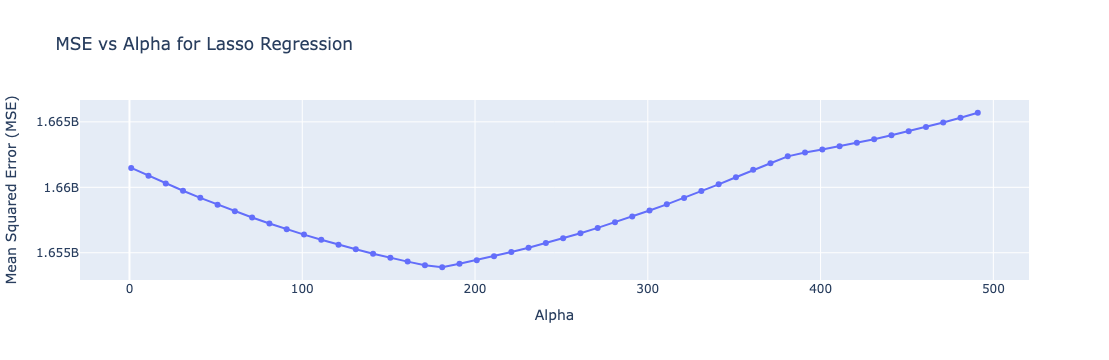

In [97]:
# visualiser validerings-MSE avhengig av alpha
mse_df = pd.DataFrame(list(mse_vals.items()), columns=['alpha', 'mse'])
fig = px.line(mse_df, x='alpha', y='mse', title='MSE vs Alpha for Lasso Regression', markers=True)
fig.update_layout(xaxis_title='Alpha', yaxis_title='Mean Squared Error (MSE)')
fig.show()

Lag alle polynomkombinasjoner av grad 2 av data (sklearn.preprocessing.PolynomialFeatures). 
Tren en Lasso regresjonsmodell (sklearn.linear_model.Lasso) med hyperparameter alpha mellom 500 og 1500 på polynomkombinasjoner av treningsdata.
Sorter de ulike modellene etter mean kvadrert feil på valideringsdata (sklearn.metrics.mean_squared_error).
Visualiser hvordan mean kvadratisk feil avhenger av alpha. 

In [98]:
# lag datasett med polynomielle data
poly = PolynomialFeatures(degree=2)
X_train_pf = poly.fit_transform(X_train)
X_val_pf = poly.transform(X_val)
X_test_pf = poly.transform(X_test)

In [99]:
# tren forskjellige modeller
alphas = np.arange(500, 1500, 50)
pf_models = {alpha: Lasso(alpha=alpha).fit(X_train_pf, y_train) for alpha in alphas}
mse_vals_pf = {}

for alpha, model in pf_models.items():
    y_pred = model.predict(X_val_pf)
    mse_vals_pf[alpha] = mean_squared_error(y_val, y_pred)

df2 = pd.DataFrame({
    'Alpha': list(mse_vals_pf.keys()),
    'MSE': list(mse_vals_pf.values())
})

/Users/jl/miniconda3/envs/INF161/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.788e+10, tolerance: 5.003e+08

/Users/jl/miniconda3/envs/INF161/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.821e+10, tolerance: 5.003e+08

/Users/jl/miniconda3/envs/INF161/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.851e+10, tolerance: 5.003e+08

/Users/jl/

In [100]:
# sjekk MSE for valideringsdata
pf_sorted_mse_vals = sorted(zip(mse_vals.keys(), mse_vals.values()), key=lambda x: x[1])
best_alpha, best_mse = pf_sorted_mse_vals[0]
pf_mse = best_mse
print(pf_sorted_mse_vals)

[(181, 1653894254.864575), (171, 1654051047.3351939), (191, 1654156936.6213908), (161, 1654325068.2615032), (201, 1654437580.1270711), (151, 1654617091.7499943), (211, 1654736229.0325441), (141, 1654929818.0514574), (221, 1655052797.8329177), (131, 1655263247.1396332), (231, 1655387328.7963438), (121, 1655617333.9116216), (241, 1655739823.1077466), (111, 1655992168.6191206), (251, 1656107544.3718305), (101, 1656387706.2902806), (261, 1656495991.035593), (91, 1656803946.773052), (271, 1656898832.5352776), (81, 1657240890.0063396), (281, 1657323055.6054542), (71, 1657698536.073589), (291, 1657765714.282094), (61, 1658176837.638567), (301, 1658225314.8797996), (51, 1658675889.3073986), (311, 1658700494.5193975), (321, 1659191573.917539), (41, 1659195596.9678586), (331, 1659719198.2495656), (31, 1659736010.251591), (341, 1660225766.7579076), (21, 1660297096.9054928), (351, 1660770517.2663798), (11, 1660878909.039699), (361, 1661335440.0998201), (1, 1661481443.683083), (371, 1661840572.1404

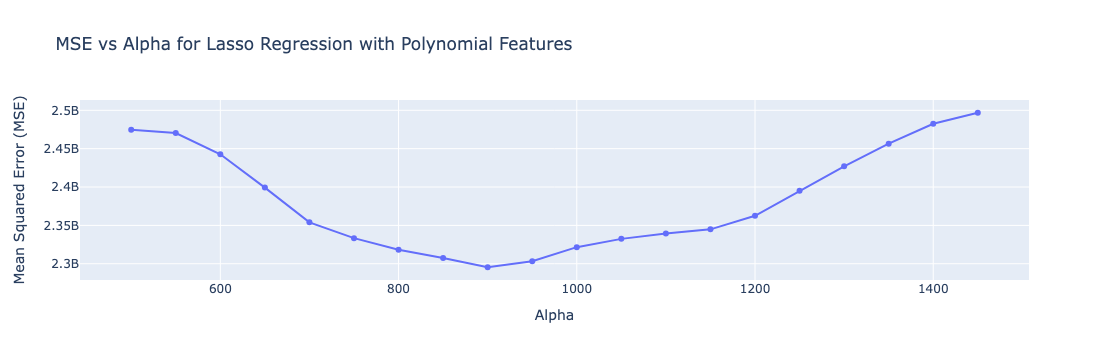

In [101]:
# visualiser validerings-MSE avhengig av alpha
fig = px.line(df2, x='Alpha', y='MSE', title='MSE vs Alpha for Lasso Regression with Polynomial Features', markers=True)
fig.update_layout(xaxis_title='Alpha', yaxis_title='Mean Squared Error (MSE)')
fig.show()

Se om du kan finne en bedre modell med en annen metode enn Lasso regresjon (e.g. sklearn.linear_model.ElasticNet, sklearn.ensemble.RandomForestRegressor, sklearn.svm.SVR, sklearn.gaussian_process.GaussianProcessRegressor). Finn gode hyperparametre til metoden du velger ut. 

In [102]:
# tren forskjellige modeller
models = [EN(), RFR(), SVR(), GPR()]

for model in models:
    model.fit(X_train, y_train)
    rmse = np.sqrt(mean_squared_error(y_val, model.predict(X_val)))
    print(model.__class__.__name__, rmse)

/Users/jl/miniconda3/envs/INF161/lib/python3.12/site-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.753e+11, tolerance: 5.003e+08



ElasticNet 41397.55829608483
RandomForestRegressor 31592.590020729414
SVR 96556.55735911446
GaussianProcessRegressor 217649.04884034558


In [103]:
# sjekk MSE for valideringsdata
mse = [mean_squared_error(y_val, model.predict(X_val)) for model in lasso_models.values()]
print(mse)

[1661481443.683083, 1660878909.039699, 1660297096.9054928, 1659736010.251591, 1659195596.9678586, 1658675889.3073986, 1658176837.638567, 1657698536.073589, 1657240890.0063396, 1656803946.773052, 1656387706.2902806, 1655992168.6191206, 1655617333.9116216, 1655263247.1396332, 1654929818.0514574, 1654617091.7499943, 1654325068.2615032, 1654051047.3351939, 1653894254.864575, 1654156936.6213908, 1654437580.1270711, 1654736229.0325441, 1655052797.8329177, 1655387328.7963438, 1655739823.1077466, 1656107544.3718305, 1656495991.035593, 1656898832.5352776, 1657323055.6054542, 1657765714.282094, 1658225314.8797996, 1658700494.5193975, 1659191573.917539, 1659719198.2495656, 1660225766.7579076, 1660770517.2663798, 1661335440.0998201, 1661840572.1404386, 1662364277.2263622, 1662663631.6689525, 1662892353.0986362, 1663137533.597878, 1663399234.7982447, 1663677483.1272924, 1663972249.8521972, 1664283555.1076305, 1664611400.796601, 1664957357.4541647, 1665318241.109428, 1665695666.772253]


Velg ut den beste modellen og sjekk hvor godt den generaliserer ved å regne ut mean kvadrert feil og kvadratrooten av mean kvadrert feil på testdata. 

In [105]:
# sjekk generaliseringsevne
best_model = RFR()
best_model.fit(X_train, y_train)
test_mse = mean_squared_error(y_test, best_model.predict(X_test))

test_mse

839835816.4799337

Gi en oppsummering over hva du har gjort og hva resultatet var. 

Vi har delt dataen opp i test, renings og validerings data, deretter brukt denne dataen til å lage ulike modeller. Etterpå har jeg sjekket hvilke modell som ga best resulatat basert på MSE.

...